In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [33]:
df=pd.read_csv("Mall_Customers.csv")

In [34]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [37]:
enc = preprocessing.LabelEncoder()
df['Genre'] = enc.fit_transform(df['Genre'])

In [38]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [39]:
df.fillna(method='ffill', inplace= True)

In [40]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df)

In [41]:
df_normalized = normalize(df_scaled)

In [42]:
df_normalized = pd.DataFrame(df_normalized)

In [43]:
pca = PCA(n_components = 2)
df_principal = pca.fit_transform(df_normalized)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ['P1', 'P2']
print(df_principal.head())

         P1        P2
0 -0.587823  0.251336
1 -0.518004  0.131250
2 -0.722251 -0.150127
3 -0.736891 -0.381058
4 -0.913203 -0.189819


In [45]:
db_default = DBSCAN(eps = 0.5, min_samples = 50).fit(df_principal)
labels = db_default.labels_

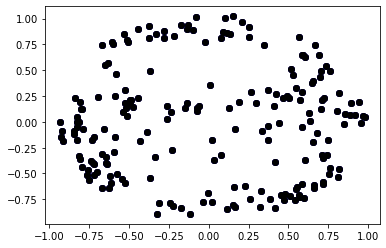

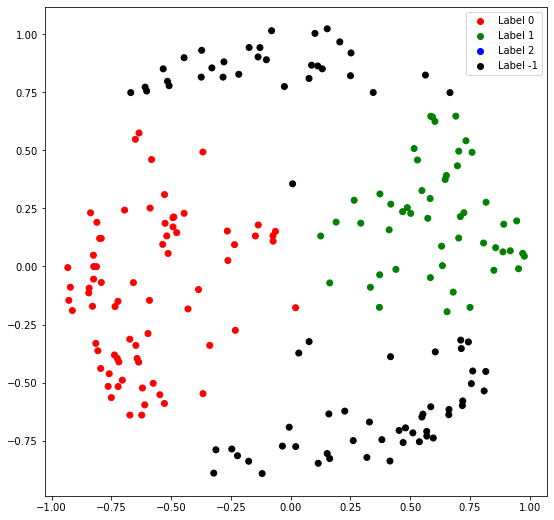

In [46]:
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
cvec = [colours[label] for label in labels]
r = plt.scatter(df_principal['P1'], df_principal['P2'], color ='r');
g = plt.scatter(df_principal['P1'], df_principal['P2'], color ='g');
b = plt.scatter(df_principal['P1'], df_principal['P2'], color ='b');
k = plt.scatter(df_principal['P1'], df_principal['P2'], color ='k');
plt.figure(figsize =(9, 9))
plt.scatter(df_principal['P1'], df_principal['P2'], c = cvec)
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()